In [1]:
import pandas as pd

df = pd.read_csv('Iris.csv')
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [3]:
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [4]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
k_values = range(1, 20, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

best_k = k_values[np.argmax(accuracies)]
print(f"Best K found: {best_k} with accuracy: {max(accuracies):.4f}")

Best K found: 3 with accuracy: 1.0000


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_vis = X.iloc[:, :2].values  # Sepal Length and Sepal Width
y_vis = y_encoded

# Split and Scale for visualization model
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)

# Train model for visualization
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis_scaled, y_train_vis)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
h = .02  # step size in the mesh
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

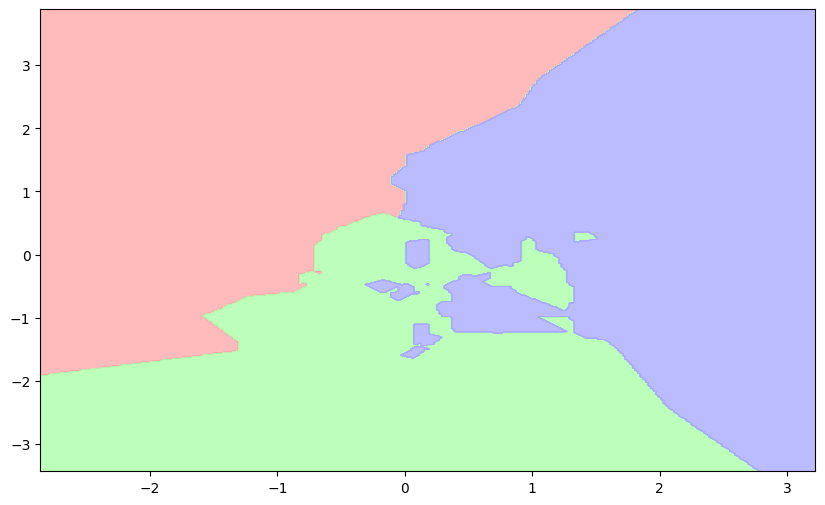

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

### Training plots

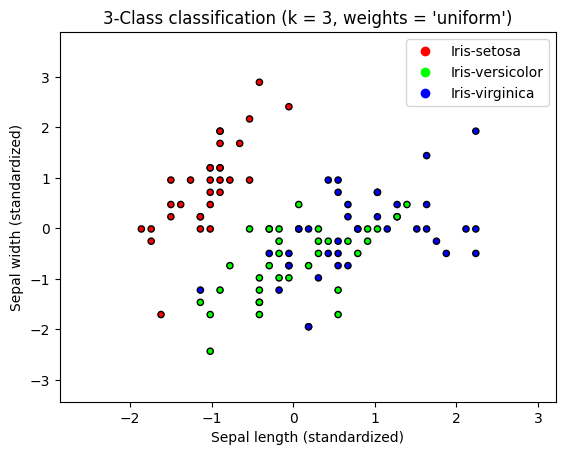

<Figure size 640x480 with 0 Axes>

In [12]:
scatter = plt.scatter(X_train_vis_scaled[:, 0], X_train_vis_scaled[:, 1], c=y_train_vis, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = {best_k}, weights = 'uniform')")
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_.tolist())
plt.show()
plt.savefig('knn_decision_boundary.png')

### Accuracy vs K value

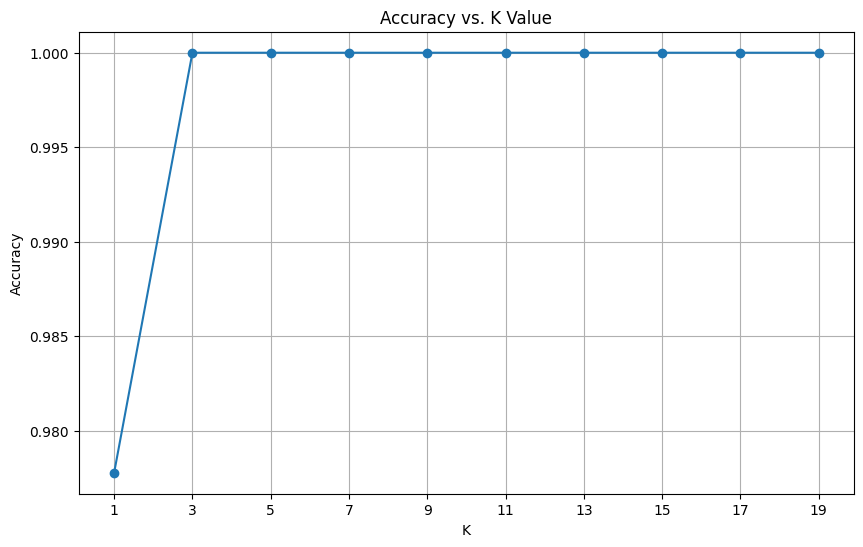

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.savefig('knn_accuracy_plot.png')
plt.show()